In [1]:
import saha_mult
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc
import importlib 
importlib.reload(saha_mult)

<module 'saha_mult' from '/home/nalamwar/Research/Abundance and Temperature Calculations/Abundance Calculations/saha_mult.py'>

In [2]:
nist = pd.read_excel("NIST Data Table.xlsx")
hf = h5py.File("SkyNet_r-process.h5")

In [3]:
nist.head(50)

,At. Num.,Sp. Name.,Ion Charge,El. name,Isoel. Seq.,Ground Shells a,Ground Level,Ionized Level (eV),Ionization Energy (eV),Uncertaintyc,References
0,1,H I,0,Hydrogen,H,1s,2S1/2,,-13.5984,8e-08,HDEL
1,2,He I,0,Helium,He,1s2,1S0,1s 2S1/2,24.5874,1.5e-07,L17714
2,2,He II,1,Helium,H,1s,2S1/2,,-54.4178,3e-07,L7188c95
3,3,Li I,0,Lithium,Li,1s22s,2S1/2,1s2 1S0,5.39171,4e-08,L12261
4,3,Li II,1,Lithium,He,1s2,1S0,1s 2S1/2,[75.6400964],1.3e-06,L10054
5,3,Li III,2,Lithium,H,1s,2S1/2,,-122.454,8e-07,L3620c96
6,4,Be I,0,Beryllium,Be,1s22s2,1S0,2s 2S1/2,9.3227,7e-06,L5964
7,4,Be II,1,Beryllium,Li,1s22s,2S1/2,1s2 1S0,18.2111,4e-05,L12158
8,4,Be III,2,Beryllium,He,1s2,1S0,1s 2S1/2,[153.896203],4e-06,L10054
9,4,Be IV,3,Beryllium,H,1s,2S1/2,,-217.719,1.7e-06,L3620c97


In [4]:
nist.columns

Index(['At. Num.  ', ' Sp.  Name.  ', ' Ion  Charge  ', ' El.  name  ',
       ' Isoel.  Seq.  ', ' Ground  Shells a  ', ' Ground  Level  ',
       ' Ionized  Level  (eV)', ' Ionization  Energy (eV)', 'Uncertaintyc ',
       ' References '],
      dtype='object')

In [5]:
#Make sure to use absolute values-later!
#Note that indices in this code represents the Z of the element, so H has an index of 1 for its ionization potentials
ion_energies1d =  nist[' Ionization  Energy (eV)']
max_el = 104 #This is defined to be the Z of the last element that I want in the list +1. Ex. Lr + 1 = 104
ion_energies = list()
counter = 0

for i in range(0,max_el):
    specific_list = list()
    
    for j in range(i):
        
        if isinstance(ion_energies1d[counter],str):
            
            if len(ion_energies1d[counter]) ==3:
                specific_list.append(0)
                counter+=1
            else:
                str_num = '' 

                for k in ion_energies1d[counter]:

                    if (k != ' ') and (k !='[') and (k !=']') and (k !='(') and (k !=')'):
                        str_num+=k
                        
                specific_list.append(np.abs(float(str_num)))
                counter+=1
                
                            
        else:
            specific_list.append(np.abs(ion_energies1d[counter]))
            counter+=1
        
    ion_energies.append(specific_list)

    
#Since it works for the vast majority of the values, this could probably be because of certain values being literally empty.
#For now, I am setting these certain values as 0 since I don't know how to calculate them, per say
#Turns out that the data table has several skips as well for elements beyond the actnidies....

In [6]:
ion = pd.DataFrame(ion_energies)
ion

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.598434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24.587389,54.417765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.391715,75.640096,122.454358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.322699,18.211150,153.896203,217.718584,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,6.367580,12.200000,22.700000,38.800000,54.1,71.0,97.0,112.9,137.0,157.0,...,37400.0,38100.0,38900.0,39451.4,154328.1,156926.0,NaN,NaN,NaN,NaN
100,6.500000,12.400000,23.200000,39.300000,55.0,74.0,93.0,120.0,136.0,162.0,...,31800.0,38400.0,39100.0,40000.0,40482.2,158152.5,160804.0,NaN,NaN,NaN
101,6.580000,12.400000,24.300000,40.000000,54.1,76.0,96.0,115.1,143.9,162.0,...,32000.0,32500.0,39500.0,40100.0,41000.0,41548.0,0.0,164764.0,NaN,NaN
102,6.626210,12.930000,25.800000,41.500000,60.0,74.0,97.0,119.0,140.0,170.0,...,32200.0,32700.0,33200.0,40500.0,41200.0,42100.0,42632.0,0.0,168806.0,NaN


In [7]:
'''import saha_mult
importlib.reload(saha_mult)

# Set up the conditions for test runs 
xi = ion_energies[1:2]
T9 = np.power(10.0, np.arange(-5.0, 0.0, 0.001))
rho = np.ones(T9.shape)*1.0 
Ytot = np.ones(T9.shape)/(len(xi)) 
lnYef = np.log(np.ones(T9.shape)*0.3)

YI = saha_mult.GetAbundances(Ytot, T9, rho, xi)
YI'''

'import saha_mult\nimportlib.reload(saha_mult)\n\n# Set up the conditions for test runs \nxi = ion_energies[1:2]\nT9 = np.power(10.0, np.arange(-5.0, 0.0, 0.001))\nrho = np.ones(T9.shape)*1.0 \nYtot = np.ones(T9.shape)/(len(xi)) \nlnYef = np.log(np.ones(T9.shape)*0.3)\n\nYI = saha_mult.GetAbundances(Ytot, T9, rho, xi)\nYI'

In [8]:
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []
m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))
for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])
        

In [9]:
abundance = hf["Y"]
charge = hf["Z"]
index_list = []
full_abundance = []
density = hf["Density"]
ion_potential = ion_energies[62:63]
kbEvpGK = 8.617e-5*1e9

for i in range(len(charge)):
    if charge[i] == 62: ##charge of samarium
        index_list.append(i)
        
full_abundance = np.sum(abundance[:, index_list], 1)

In [10]:
YI = saha_mult.GetAbundances(full_abundance,np.array(full_temp),np.array(density),np.array(ion_potential))


/home/nalamwar/Research/Abundance and Temperature Calculations/Abundance Calculations/saha_mult.py:109: RuntimeWarning: divide by zero encountered in log
  fLow = np.log(GetYefContribution(Ytot, T9, rho, lnYefLow, xi)) - lnYefLow
/home/nalamwar/Research/Abundance and Temperature Calculations/Abundance Calculations/saha_mult.py:110: RuntimeWarning: divide by zero encountered in log
  fHi = np.log(GetYefContribution(Ytot, T9, rho, lnYefHi, xi)) - lnYefHi
/home/nalamwar/Research/Abundance and Temperature Calculations/Abundance Calculations/saha_mult.py:121: RuntimeWarning: divide by zero encountered in log
  fMid = np.log(GetYefContribution(Ytot, T9, rho, lnYefMid, xi)) - lnYefMid


Text(0, 0.5, 'Abundance')

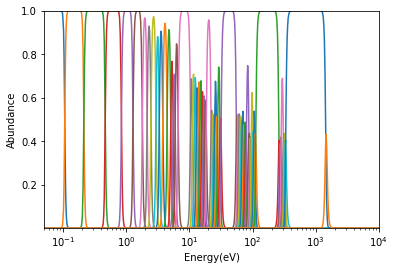

In [11]:
#Make a note that the structure of this YI is multidimensional, with a shape of (1,2198,N=Z)
Ytot = np.sum(YI[0],1)
for i in range(len(ion_potential[0])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(YI[0][:,i])/Ytot[0])

plt.ylim([1.e-5, 1])
plt.xlim([0.05, 1e4])
plt.xlabel("Energy(eV)")
plt.ylabel("Abundance")


In [12]:
Y = pd.DataFrame(YI[0])
Y

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
3,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
4,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,4.627743e-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2194,4.627743e-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2195,4.627743e-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2196,4.627743e-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [13]:
#This is just a test to see if it works, period!

index_listSm = []
index_listEu = []

full_abundanceSm = []
full_abundancesEu = []

ion_potential = ion_energies[62:64]

for i in range(len(charge)):
    if charge[i] == 62: ##charge of samarium
        index_listSm.append(i)
        
for i in range(len(charge)):
    if charge[i] == 63: ##charge of europium
        index_listEu.append(i)
        
full_abundanceSm = np.sum(abundance[:, index_listSm], 1)
full_abundanceEu = np.sum(abundance[:, index_listEu], 1)

full_list_abun = np.vstack((full_abundanceSm,full_abundanceEu))


In [14]:
#Getting abundances for Eu and Sm 
YI = saha_mult.GetAbundances(full_list_abun,np.array(full_temp),np.array(density),np.array(ion_potential))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


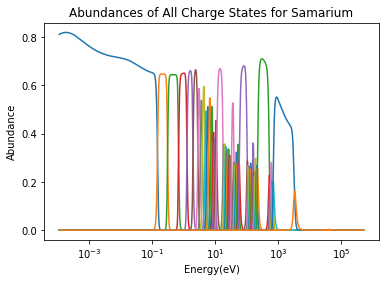

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


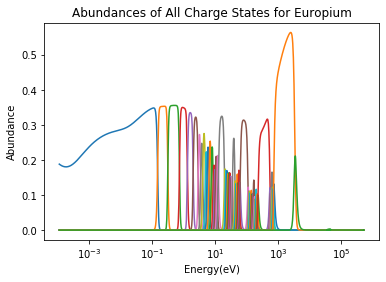

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Abundances of All Charge States for Samarium and Europium')

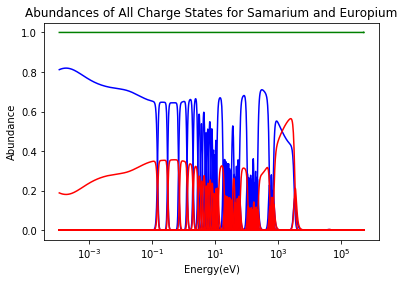

In [24]:
#Getting plot for Eu and Sm
#Note that the shape of the abundance arrays is one more than the Z because it also accounts for fully ionized
Ytot = np.sum(YI[0],1) + np.sum(YI[1],1)

for i in range(len(ion_potential[0])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(YI[0][:,i])/Ytot)
    
plt.xlabel("Energy(eV)")
plt.ylabel("Abundance")
plt.title("Abundances of All Charge States for Samarium")
plt.show()

for i in range(len(ion_potential[1])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(YI[1][:,i])/Ytot)

plt.xlabel("Energy(eV)")
plt.ylabel("Abundance")
plt.title("Abundances of All Charge States for Europium")
plt.show()


for i in range(len(ion_potential[0])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(YI[0][:,i])/Ytot,color = 'b')
    
for i in range(len(ion_potential[1])):
    plt.semilogx(kbEvpGK*np.array(full_temp),(YI[1][:,i])/Ytot,color = 'r')

plt.semilogx(kbEvpGK*np.array(full_temp),Ytot/Ytot,color = 'g')    
    

plt.xlabel("Energy(eV)")
plt.ylabel("Abundance")
plt.title("Abundances of All Charge States for Samarium and Europium")

In [25]:
Sm = pd.DataFrame(YI[0])
Sm

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733026e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869510e-129,6.890581e-120,9.733026e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427887e-147,3.439394e-138,4.869510e-129,6.890582e-120,9.733027e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427887e-147,3.439395e-138,4.869511e-129,6.890583e-120,9.733029e-111,1.373940e-101,1.937976e-92,2.732132e-83,3.560010e-74,4.627744e-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.000070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2194,0.000070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2195,0.000069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2196,0.000069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [26]:
Eu = pd.DataFrame(YI[1])
Eu

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.958755e-151,9.850464e-142,1.393563e-132,1.970423e-123,2.780803e-114,3.921951e-105,5.526981e-96,7.784693e-87,1.010677e-77,1.308969e-68
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.958755e-151,9.850465e-142,1.393563e-132,1.970423e-123,2.780803e-114,3.921951e-105,5.526981e-96,7.784693e-87,1.010677e-77,1.308969e-68
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.958755e-151,9.850465e-142,1.393563e-132,1.970423e-123,2.780803e-114,3.921951e-105,5.526981e-96,7.784694e-87,1.010677e-77,1.308969e-68
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.958756e-151,9.850466e-142,1.393563e-132,1.970424e-123,2.780804e-114,3.921951e-105,5.526982e-96,7.784694e-87,1.010677e-77,1.308969e-68
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.958757e-151,9.850467e-142,1.393563e-132,1.970424e-123,2.780804e-114,3.921952e-105,5.526982e-96,7.784695e-87,1.010677e-77,1.308969e-68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2194,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2195,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2196,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
